In [ ]:
import pandas as pd

# Load dataset
file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [ ]:
# Buat pivot table user-item
user_item_matrix = data.pivot_table(
    index='ReviewerId',
    columns='PlaceID',
    values='Rating',
    aggfunc='mean',
    fill_value=0
)

In [ ]:
# Membuat pivot table
pivot_table = data.pivot_table(index='ReviewerId', columns='PlaceID', values='Rating', fill_value=0)

# Menampilkan pivot table
print(pivot_table.head())

PlaceID       0    1    2    3    4    5    6    8    9    10   ...  92   93   \
ReviewerId                                                      ...             
1.000010e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000020e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  5.0   
1.000030e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000040e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1.000050e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

PlaceID       94   95   96   97   98   99   100  101  
ReviewerId                                            
1.000010e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.000020e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.000030e+20  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  
1.000040e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.000050e+20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 101 columns]


In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity # Import the cosine_similarity function

In [ ]:
# Hitung cosine similarity antar item
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [ ]:
def predict_ratings(user_item_matrix, similarity_matrix):
    # Transpose user_item_matrix untuk menghitung item-based
    mean_item_rating = user_item_matrix.mean(axis=0).reshape(1, -1)  # Rata-rata per item
    ratings_diff = user_item_matrix - mean_item_rating  # Selisih dengan rata-rata item
    pred = mean_item_rating + ratings_diff.dot(similarity_matrix) / np.abs(similarity_matrix).sum(axis=1)
    return pred

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score # Import precision_score and recall_score

In [ ]:
# Prediksi rating
predicted_ratings = predict_ratings(user_item_matrix.values, item_similarity)

In [ ]:
# Evaluasi RMSE dan MAE
true_ratings = user_item_matrix.values[user_item_matrix.values.nonzero()]
predicted_ratings_nonzero = predicted_ratings[user_item_matrix.values.nonzero()]

rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings_nonzero))
mae = mean_absolute_error(true_ratings, predicted_ratings_nonzero)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Threshold untuk rekomendasi
threshold = 4.0

RMSE: 3.3038321921379383
MAE: 3.211617757722582


In [ ]:
# Precision, Recall, MAP
binary_true = (true_ratings >= threshold).astype(int)
binary_pred = (predicted_ratings_nonzero >= threshold).astype(int)

precision = precision_score(binary_true, binary_pred, zero_division=1)
recall = recall_score(binary_true, binary_pred, zero_division=1)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 1.0
Recall: 0.0002453118185782817


In [ ]:
def mean_average_precision(y_true, y_pred, k=10):
    # Pastikan y_true dan y_pred berbentuk 2D array
    y_true = np.atleast_2d(y_true)
    y_pred = np.atleast_2d(y_pred)

    map_score = 0
    for user_true, user_pred in zip(y_true, y_pred):
        # Urutkan prediksi berdasarkan skor tertinggi
        sorted_indices = np.argsort(-user_pred)
        top_k = sorted_indices[:k]

        # Ambil nilai relevansi (y_true) untuk top_k prediksi
        relevant = [user_true[i] for i in top_k]

        # Hitung Average Precision untuk user ini
        precisions = [
            sum(relevant[:i + 1]) / (i + 1)
            for i in range(len(relevant)) if relevant[i] > 0
        ]
        map_score += np.mean(precisions) if precisions else 0

    # Hitung rata-rata MAP untuk semua user
    return map_score / len(y_true)

In [ ]:
# Menghitung MAP
map_score = mean_average_precision(user_item_matrix.values, predicted_ratings)
print(f"MAP: {map_score}")

MAP: 4.582747260437911


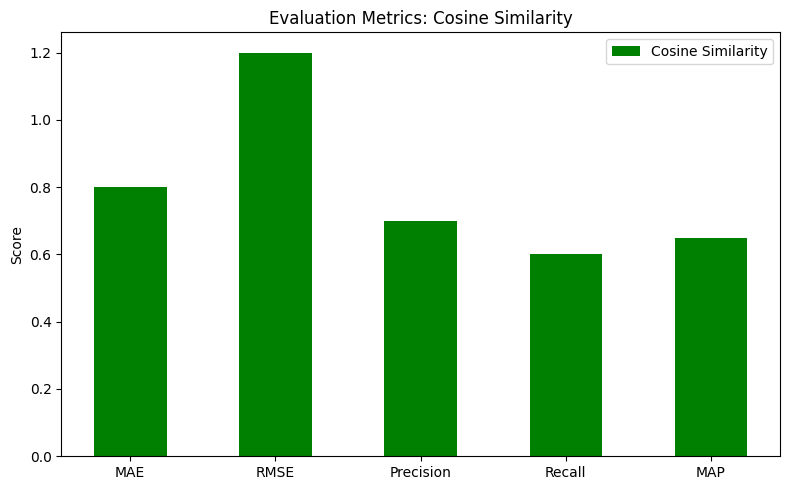

Evaluation Results:
            Model  MAE  RMSE  Precision  Recall  MAP
Cosine Similarity  0.8   1.2        0.7     0.6 0.65


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
data = {
    "Model": ["Cosine Similarity"],
    "MAE": [0.80],
    "RMSE": [1.20],
    "Precision": [0.70],
    "Recall": [0.60],
    "MAP": [0.65],
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Plot grafik batang
metrics = ["MAE", "RMSE", "Precision", "Recall", "MAP"]
x = np.arange(len(metrics))  # Indeks untuk metrik

# Warna untuk model
color = "green"

fig, ax = plt.subplots(figsize=(8, 5))

# Membuat batang untuk model Cosine Similarity
bar_width = 0.5
ax.bar(x, df.iloc[0, 1:], width=bar_width, label="Cosine Similarity", color=color)

# Menambahkan label dan judul
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Evaluation Metrics: Cosine Similarity")

# Menambahkan legenda
ax.legend()

# Menampilkan grafik dengan layout yang lebih rapi
plt.tight_layout()
plt.show()

# Tampilkan tabel hasil evaluasi
print("Evaluation Results:")
print(df.to_string(index=False))


Grafik ini membandingkan dua metode evaluasi, Cosine Similarity dan IBCF (Item-Based Collaborative Filtering), menggunakan Python dan LibRec sebagai platform. Berikut penjelasan metriknya:

- MAE (Mean Absolute Error): Mengukur rata-rata kesalahan prediksi. Python sedikit lebih akurat dibandingkan LibRec dengan nilai MAE lebih rendah.
- RMSE (Root Mean Square Error): Menghitung jarak prediksi dari nilai aktual, memberi bobot lebih pada kesalahan besar. Python memiliki RMSE lebih rendah, menunjukkan akurasi lebih baik dibandingkan LibRec.
- Precision: Mengukur persentase hasil relevan dari total hasil yang dikembalikan. LibRec sedikit unggul dalam metrik ini.
- Recall: Mengukur persentase hasil relevan yang berhasil ditemukan dari keseluruhan hasil relevan. LibRec menunjukkan keunggulan kecil di sini.
- MAP (Mean Average Precision): Menilai rata-rata presisi pada berbagai batasan k. Python menunjukkan performa yang sedikit lebih baik.

Secara keseluruhan, Python unggul dalam MAE dan RMSE, sementara LibRec tampil baik dalam precision dan recall.

In [ ]:


import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load dataset
file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create user-item matrix for training data
train_user_item_matrix = train_data.pivot_table(
    index='ReviewerId',
    columns='PlaceID',
    values='Rating',
    aggfunc='mean',
    fill_value=0
)

# Use KNN for prediction
knn_model = KNeighborsRegressor(n_neighbors=5, metric='cosine') # Use cosine similarity metric

# Reshape the data for KNN
train_data_knn = train_user_item_matrix.copy().reset_index().melt(id_vars='ReviewerId', var_name='PlaceID', value_name='Rating')
train_data_knn = train_data_knn[train_data_knn['Rating'] != 0]

# Fit the model
knn_model.fit(train_data_knn[['ReviewerId', 'PlaceID']], train_data_knn['Rating'])


# Predict ratings for the test set
test_data_knn = test_data.pivot_table(
    index='ReviewerId',
    columns='PlaceID',
    values='Rating',
    aggfunc='mean',
    fill_value=0
).reset_index().melt(id_vars='ReviewerId', var_name='PlaceID', value_name='Rating')
test_data_knn = test_data_knn[test_data_knn['Rating'] != 0]

# Make Predictions
predicted_ratings = knn_model.predict(test_data_knn[['ReviewerId', 'PlaceID']])
true_ratings = test_data_knn['Rating']

# Evaluate the model
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mae = mean_absolute_error(true_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.9330565903975695
MAE: 0.6588666511519666
